# Definição de ICP e Análise de Clientes

Dado o seguinte objetivo traçado no Relatório de Formalização entregue *“Criação de um Modelo de Aprendizado que nos aproxime da identificação do Perfil de Cliente Ideal na área de Tecnologia em Saúde”*, foi possível estruturar as atividades e preparações necessárias:

Em relação a base de dados - o primeiro elemento a ser abordado -, estão sendo utilizados dados verdadeiros de uma empresa da área de Tecnologia em Saúde. Isso nos permite desenvolver um modelo a partir de dados do mundo real, aproximando-o de problemas e situações do cotidiano da área.

O contexto da empresa é o seguinte: a mesma possui soluções de saúde que conseguem reduzir drasticamente o custo de seus clientes com convênio. Através de diversas estratégias e abordagens realizadas, essa permite que o custo com planos de saúde e relacionados não aumente gradativamente. Portanto, determinar um ICP (ou algo próximo disso) é de extrema importância, já que isso faz com que a empresa consiga oferecer seus serviços diretamente ao público alvo que possui essa dor.

Baseando-se na Metodolgia Experimental também apresentada no Relatório, algumas dessas ações foram feitas antes da implementação neste projeto para facilitar o desenvolvimento do mesmo. Sendo assim, as seguintes fases foram levadas em consideração:

1.   Limpeza dos Dados
2.   Integração dos Dados
3.   Seleção dos Dados
4.   Transformação dos Dados
5.   Mineração dos Dados
6.   Avaliação dos Dados
7.   Visualização dos Dados

A base de dados original possui 560 amostras (clientes) e 56 atributos, sendo a maioria do tipo não numérica, embora haja também valores numéricos. Seus atributos inicialmente são os seguintes:

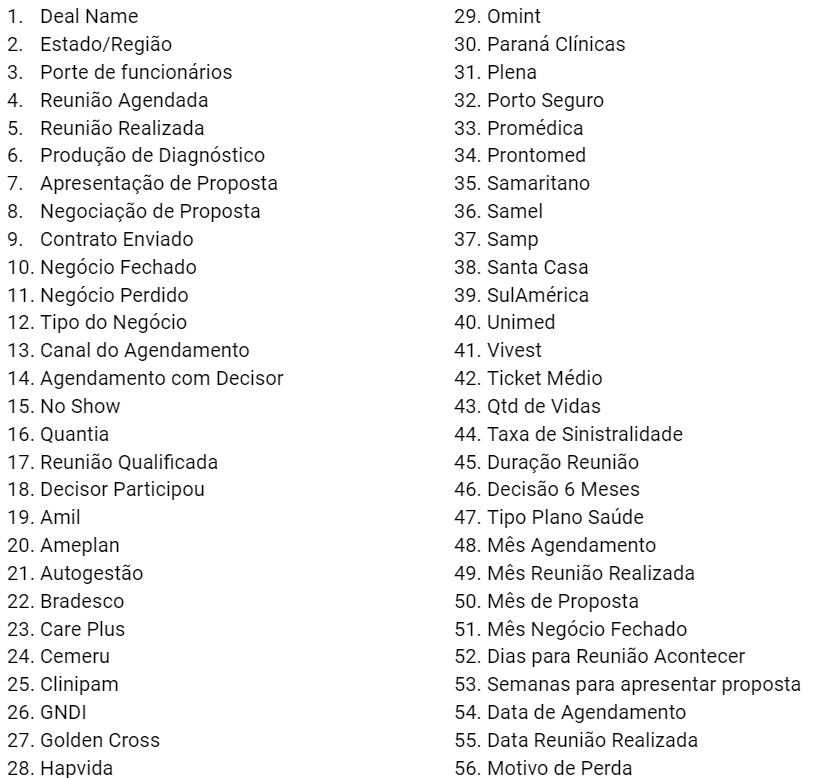

Uma triagem preventiva foi feita em cima da base a fim de facilitar o trabalho de exploração, limpeza e formatação da mesma. Isso fez com que os atributos fossem aumentados para 56, devido a separação de algumas categorias em outras colunas, semelhante a estratégia utilizada pelo *One-Hot Encoder*. Foi realizada também a transformação da maioria dos dados categóricos em numéricos, utilizando a ideia do *Label Encoder*.

As informações sobre o estado atual da base estão ao longo da implementação do modelo. Por questões de privacidade, as empresas foram renomeadas com nomes genéricos. O atributo "Apresentação de Proposta" é a verdade sobre os nossos dados e será o alvo no resultado final do projeto.

Durante o desenvolvimento, a expectativa é que as seguintes questões sejam levantadas e respondidas (ou ao menos direcionadas a resposta):

1.   Relação entre o perfil do cliente e as classes
2.   Proximidade entre os clientes
3.   Janelas para o negócio ser fechado
4.   Estimativa de negócio perdido baseado nas informações obtidas

É esperado, portanto, que uma aproximação ao Perfil Ideal de Cliente (ICP) através da análise dos clientes seja feita.

Iniciando-se o desenvolvimento, realizamos as importações necessárias (Drive, bibliotecas e afins).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

Fornecendo a localização da base de dados e exibindo os 5 primeiros elementos:

In [ ]:
# Alterando a configuração de exibição das linhas e colunas para que todos os valores da correlação sejam exibidos
pd.options.display.max_rows = None
pd.options.display.max_columns = None

path = '/content/drive/MyDrive/IA_2024/ICP/Dataset_ICP_Deals.csv'

data = pd.read_csv(path, on_bad_lines='error')
data.head()

,Deal Name,Estado/Região,Porte de funcionários,Reuniao Agendada,Reuniao Realizada,Producao de Diagnostico,Apresentacao de Proposta,Negociacao de Proposta,Contrato Enviado,Negocio Fechado,Negocio Perdido,Tipo do Negocio,Canal do Agendamento,Agendamento com Decisor,No Show,Quantia,Reuniao Qualificada,Decisor Participou,Amil,Ameplan,Autogestao,Bradesco,Care Plus,Cemeru,Clinipam,GNDI,Golden Cross,Hapvida,Omint,Parana Clinicas,Plena,Porto Seguro,Promedica,Prontomed,Samaritano,Samel,Samp,Santa Casa,SulAmerica,Unimed,Vivest,Ticket Medio,Qtd de Vidas,Taxa de Sinistralidade,Duracao Reuniao,Decisao 6 meses,Tipo Plano Saude,Mes Agendamento,Mes Reuniao Realizada,Mes de Proposta,Mes Negocio Fechado,Dias para Reuniao Acontecer,Semanas para apresentar proposta,Data de Agendamento,Data Reuniao Realizada,Motivo de Perda
0,Empresa1,16,3,1,1,0,0,0,0,0,1,21,0,0,1,"R$ 126.000,00",1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,700.0,0,0,0,0,3,3,0,0,3,0,27/03/2023,30/03/2023,Sem retorno após tentativas de contato
1,Empresa2,2,4,1,0,0,0,0,0,0,1,8,2,0,0,"R$ 216.000,00",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1200.0,0,0,0,0,6,0,0,0,0,0,29/06/2023,NaN,No-Show
2,Empresa3,11,6,1,1,0,0,0,0,0,1,11,0,0,1,"R$ 1.800.000,00",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10000.0,0,0,0,0,10,11,0,0,18,0,17/10/2022,04/11/2022,Já tem um produto concorrente ou similar
3,Empresa4,16,6,1,1,0,0,0,0,0,1,11,1,0,1,"R$ 1.260.000,00",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,7000.0,0,0,0,0,5,6,0,0,48,0,03/05/2023,20/06/2023,Solução em Saúde não é prioridade no momento
4,Empresa5,7,4,1,1,0,0,0,0,0,1,8,2,0,1,"R$ 90.000,00",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,500.0,0,0,0,0,1,1,0,0,4,0,12/01/2023,16/01/2023,NaN


Conhecendo o número de elementos e atributos da base, além de quais são eles e seus tipos:

In [ ]:
data.shape

(560, 56)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Deal Name                         560 non-null    object 
 1   Estado/Região                     560 non-null    int64  
 2   Porte de funcionários             560 non-null    int64  
 3   Reuniao Agendada                  560 non-null    int64  
 4   Reuniao Realizada                 560 non-null    int64  
 5   Producao de Diagnostico           560 non-null    int64  
 6   Apresentacao de Proposta          560 non-null    int64  
 7   Negociacao de Proposta            560 non-null    int64  
 8   Contrato Enviado                  560 non-null    int64  
 9   Negocio Fechado                   560 non-null    int64  
 10  Negocio Perdido                   560 non-null    int64  
 11  Tipo do Negocio                   560 non-null    int64  
 12  Canal do

A partir disso, é feita a exclusão dos atributos que ainda permaneceram na base porém não são necessários/relevantes:

In [ ]:
data = data.drop(['Deal Name', 'Reuniao Agendada', 'Data de Agendamento', 'Data Reuniao Realizada'], axis=1)

Verificando a quantidade de campos da base que estão brancos ou inválidos (não numéricos):

In [ ]:
data.isna().sum()

,0
Estado/Região,0
Porte de funcionários,0
Reuniao Realizada,0
Producao de Diagnostico,0
Apresentacao de Proposta,0
Negociacao de Proposta,0
Contrato Enviado,0
Negocio Fechado,0
Negocio Perdido,0
Tipo do Negocio,0


Ajustando a formatação dos valores decimais para "Quantia", além de adicionar a média de todos os valores para os campos em branco.

In [ ]:
data['Quantia'] = data['Quantia'].str.replace('R$', '').str.replace('.', '', regex=False).str.replace(',', '.', regex=False)

data['Quantia'] = pd.to_numeric(data['Quantia'])

In [ ]:
common_value = data['Quantia'].mean()

data['Quantia'].fillna(common_value, inplace=True)

In [ ]:
data['Quantia'].isna().sum()

0

Adicionando a média de todos os valores para os campos em branco para o atributo "Qtd de Vidas".

In [ ]:
common_value = data['Qtd de Vidas'].mean()

data['Qtd de Vidas'].fillna(common_value, inplace=True)

In [ ]:
data['Qtd de Vidas'].isna().sum()

0

Em relação ao "Motivo de Perda", primeiramente identifica-se todas as categorias do atributo.

Após isso, é realizada a conversão de tipo para transformar os dados categóricos em numéricos e também uma Imputação Multivariada utilizando o algoritmo kNN para preencher os valores faltantes neste atributo.

É válido ressaltar que haviam formas mais simples de preencher essas informações, como inserir a Moda (valor que mais aparece) ou uma nova categoria denominada "Desconhecido", porém isso poderia trazer alguns problemas como enviesamento ou ausência de informação nos dados.

Nesse sentido, a Imputação Multivariada tem muito valor pois preenche os valores ausentes com base nas proximidades calculadas usando os vizinhos mais próximos (no caso, definido como 5).

In [ ]:
data['Motivo de Perda'].describe()

,Motivo de Perda
count,318
unique,18
top,No-Show
freq,78


In [ ]:
data['Motivo de Perda'].unique()

array(['Sem retorno após tentativas de contato', 'No-Show',
       'Já tem um produto concorrente ou similar',
       'Solução em Saúde não é prioridade no momento', nan,
       'Sinistralidade controlada',
       'Ticket médio per capita abaixo R$ 400',
       'Projeto em andamento que impossibilita novas negociações no momento',
       'Contrato com corretora global',
       'Troca recente de corretora/operadora de saúde',
       'RFP sem sinergia com produto Alinea', 'Reorganização interna',
       'Contratação de produto concorrente ou similar',
       'Renovação recente da corretora/plano de saúde',
       'Parte de outro grupo econômico, sem poder de decisão',
       'Orçamento comprometido',
       'Plano financiado total ou majoritariamente pelo colaborador',
       'Plano de saúde de gestão própria',
       'Em negociação com corretora/operadora de saúde'], dtype=object)

In [ ]:
# Substituindo os valores NaN por um marcador temporário
data['Motivo de Perda'] = data['Motivo de Perda'].astype(str)
data['Motivo de Perda'] = data['Motivo de Perda'].replace('None', np.nan)

# Convertendo as categorias em valores numéricos utilizando LabelEncoder
le = LabelEncoder()
data['Motivo de Perda'] = le.fit_transform(data['Motivo de Perda'].fillna('Unknown'))

# Inicializando o KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)

# Ajustando e transformando os dados
df_imputed = pd.DataFrame(knn_imputer.fit_transform(data[['Motivo de Perda']]), columns=['Motivo de Perda'])

# Convertendo os valores de volta para o formato original
df_imputed['Motivo de Perda'] = df_imputed['Motivo de Perda'].astype(int)
df_imputed['Motivo de Perda'] = le.inverse_transform(df_imputed['Motivo de Perda'])

print(data['Motivo de Perda'])

0      13
1       4
2       3
3      15
4      18
5      14
6      18
7      18
8      18
9       4
10     15
11     16
12     18
13      9
14      9
15      4
16     18
17     18
18     18
19     18
20     18
21     18
22     18
23      1
24      4
25     18
26      3
27     18
28     18
29      4
30      4
31     14
32     18
33     18
34     17
35     18
36      9
37     18
38      3
39      1
40     18
41     18
42     10
43     18
44     18
45     18
46     18
47      3
48     12
49      3
50      3
51      0
52      9
53      3
54      1
55     18
56     13
57     18
58     18
59     18
60     18
61     13
62     13
63     11
64      3
65     18
66     18
67     13
68     18
69     18
70     18
71     18
72     16
73     18
74     18
75      3
76     18
77     12
78     18
79      4
80     18
81     18
82      4
83     18
84      3
85     13
86      3
87     10
88     18
89     18
90     18
91     18
92     18
93     18
94      6
95     18
96     13
97     18
98     18
99     15


Descrevendo os dados após as manipulações necessárias para tornar a base de dados utilizável para o modelo.

In [ ]:
data.describe()

,Estado/Região,Porte de funcionários,Reuniao Realizada,Producao de Diagnostico,Apresentacao de Proposta,Negociacao de Proposta,Contrato Enviado,Negocio Fechado,Negocio Perdido,Tipo do Negocio,Canal do Agendamento,Agendamento com Decisor,No Show,Quantia,Reuniao Qualificada,Decisor Participou,Amil,Ameplan,Autogestao,Bradesco,Care Plus,Cemeru,Clinipam,GNDI,Golden Cross,Hapvida,Omint,Parana Clinicas,Plena,Porto Seguro,Promedica,Prontomed,Samaritano,Samel,Samp,Santa Casa,SulAmerica,Unimed,Vivest,Ticket Medio,Qtd de Vidas,Taxa de Sinistralidade,Duracao Reuniao,Decisao 6 meses,Tipo Plano Saude,Mes Agendamento,Mes Reuniao Realizada,Mes de Proposta,Mes Negocio Fechado,Dias para Reuniao Acontecer,Semanas para apresentar proposta,Motivo de Perda
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,5.600000e+02,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000
mean,13.439286,4.130357,0.778571,0.048214,0.046429,0.019643,0.010714,0.010714,0.930357,13.194643,1.212500,0.246429,0.641071,9.556529e+05,0.516071,0.185714,0.176786,0.008929,0.016071,0.242857,0.017857,0.001786,0.005357,0.042857,0.001786,0.078571,0.007143,0.010714,0.003571,0.021429,0.001786,0.003571,0.001786,0.003571,0.001786,0.001786,0.183929,0.507143,0.003571,0.112500,5480.507168,0.087500,0.142857,0.096429,0.262500,5.741071,4.512500,0.300000,0.064286,11.714286,0.408929,12.316071
std,3.756910,1.421458,0.415580,0.214410,0.210600,0.138894,0.103046,0.103046,0.254772,6.040973,1.314371,0.431316,0.480115,2.434380e+06,0.500188,0.389224,0.381828,0.094152,0.125863,0.429193,0.132551,0.042258,0.073061,0.202716,0.042258,0.269309,0.084288,0.103046,0.059708,0.144938,0.042258,0.059708,0.042258,0.059708,0.042258,0.042258,0.387772,0.500396,0.059708,0.316263,14040.934714,0.282819,0.350240,0.295442,0.583636,3.261818,3.741158,1.557256,0.660251,26.591331,2.689460,6.284128
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,0.000000,0.000000,9.000000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,500.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,16.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,1.000000,0.000000,1.000000,2.160000e+05,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1200.000000,0.000000,0.000000,0.000000,0.000000,5.000000,4.000000,0.000000,0.000000,6.000000,0.000000,14.000000
75%,16.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,20.000000,2.000000,0.000000,1.000000,9.000000e+05,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

Em relação a correlação, é uma medida estatística que indica a força e a direção de uma relação linear entre duas variáveis. No contexto de uma base de dados, a correlação é geralmente calculada usando o coeficiente de correlação de Pearson, que varia de -1 a 1.

Quando o resultado é 1, temos uma correlação positiva perfeita, isto é, à medida que uma variável aumenta, a outra também aumenta proporcionalmente.

Analogamente, -1 indica uma correlação negativa perfeita e à medida que uma variável aumenta, a outra diminui de forma proporcional.

Quando próximo do 0, não há correlação linear entre os atributos.

Essas percepções ajudam na identificação de redundâncias (quando próximos de 1) e falta de relacionamento (quando próximo de 0). Nos dois casos, auxiliam na consideração de apenas informações relevantes e não repetidas.

Na correlação calculada para nossa base de dados, podemos constatar ocorrências desses casos:

1.   A correlação entre a **Produção de Diagnóstico** e a **Apresentação de Proposta** é de 0.960419, o que de fato faz sentido pois antes da exibição da proposta de solução da empresa ao possível cliente, é necessário que o diagnóstico do estado do possível contratante seja feito. Dessa forma, se há aumento na produção da análise, significa que mais apresentações vão ocorrer.

2.   A correlação entre a **Negociação de Proposta** e **Negócio Perdido** é de -0.584548, o que também faz sentido pois se não há negociação de proposta, dificlmente o negócio será fechado. A recíproca também é verdadeira, já que se a quantidade de negócios perdidos aumenta, pode significar que a negociação de proposta não está ocorrendo, consequentemente diminuindo.

3. A correlação entre a **Decisão 6 meses** e o convênio **Porto Serguro** é 0.000082, o que indica que não há relação linear entre o cliente tomar a decisão acerca da negociação em até 6 meses e ser contratante da Porto Seguro.

Os valores de correlação são variados e nos mostram que um entendimento maior do contexto requer uma análise mais aprofundada em conjunto com os especialistas do domínio.


In [ ]:
data.corr()

,Estado/Região,Porte de funcionários,Reuniao Realizada,Producao de Diagnostico,Apresentacao de Proposta,Negociacao de Proposta,Contrato Enviado,Negocio Fechado,Negocio Perdido,Tipo do Negocio,Canal do Agendamento,Agendamento com Decisor,No Show,Quantia,Reuniao Qualificada,Decisor Participou,Amil,Ameplan,Autogestao,Bradesco,Care Plus,Cemeru,Clinipam,GNDI,Golden Cross,Hapvida,Omint,Parana Clinicas,Plena,Porto Seguro,Promedica,Prontomed,Samaritano,Samel,Samp,Santa Casa,SulAmerica,Unimed,Vivest,Ticket Medio,Qtd de Vidas,Taxa de Sinistralidade,Duracao Reuniao,Decisao 6 meses,Tipo Plano Saude,Mes Agendamento,Mes Reuniao Realizada,Mes de Proposta,Mes Negocio Fechado,Dias para Reuniao Acontecer,Semanas para apresentar proposta,Motivo de Perda
Estado/Região,1.000000,0.051230,0.011998,0.069154,0.084965,0.041715,0.029409,0.029409,-0.115630,0.160413,0.150607,0.174847,-0.027476,0.054554,-0.012331,0.161869,0.065484,0.004064,-0.079272,0.141185,0.091989,-0.027486,0.050067,0.102078,-0.016218,-0.039479,0.057864,-0.012179,0.008943,0.100953,0.028854,-0.102705,-0.027486,-0.078781,-0.095095,0.028854,0.156875,-0.157731,-0.030931,0.119432,0.055671,0.078247,0.090895,0.081034,0.129253,-0.086027,-0.072303,0.078339,0.040520,0.084471,0.057081,0.003050
Porte de funcionários,0.051230,1.000000,0.045922,-0.020659,-0.008302,-0.076419,-0.082831,-0.070617,0.044872,-0.031293,0.037809,0.008785,0.071303,0.121293,0.058692,-0.030902,-0.065608,-0.035445,-0.011731,0.082899,0.073074,-0.003882,-0.006736,-0.062880,-0.093227,-0.017457,0.007146,-0.058404,-0.089806,0.003783,-0.033664,-0.068728,-0.003882,0.015582,0.055681,0.025899,0.040806,0.095517,-0.005495,0.011092,0.140440,0.024975,0.005647,-0.047024,0.049245,-0.030518,0.008607,-0.025780,-0.041349,-0.004929,0.014108,-0.043272
Reuniao Realizada,0.011998,0.045922,1.000000,0.120029,0.117675,0.013504,0.013726,0.013726,-0.044533,0.052827,-0.018504,0.135303,0.703751,0.095641,0.542115,0.243625,-0.012159,-0.040821,0.068157,0.061324,0.039434,0.022556,-0.019780,-0.014561,0.022556,0.027858,0.045234,0.055499,-0.040167,0.019517,0.022556,-0.040167,0.022556,0.031928,0.022556,0.022556,0.108868,0.085041,-0.040167,0.149039,0.074641,0.119480,0.205426,0.159646,0.225322,0.031531,0.643824,0.102829,0.032412,0.235143,0.081159,0.248786
Producao de Diagnostico,0.069154,-0.020659,0.120029,1.000000,0.940770,0.508774,0.381416,0.300448,-0.331403,0.017602,0.065145,0.335550,0.116277,-0.018926,0.151227,0.385542,0.004956,-0.021363,-0.028765,0.047488,-0.030348,-0.009519,-0.016518,0.034690,-0.009519,-0.034743,0.079896,-0.023423,-0.013475,0.024260,-0.009519,-0.013475,-0.009519,-0.013475,-0.009519,-0.009519,0.065279,0.055142,-0.013475,0.289204,-0.004474,0.313815,0.313088,0.321839,0.284660,0.079272,0.102950,0.819201,0.306620,0.079293,0.669960,0.016551
Apresentacao de Proposta,0.084965,-0.008302,0.117675,0.940770,1.000000,0.519182,0.389201,0.389201,-0.306381,0.044911,0.067697,0.326780,0.112030,-0.024564,0.145745,0.374747,-0.013268,-0.020944,-0.028201,0.053154,-0.029753,-0.009333,-0.016194,0.037114,-0.009333,-0.032893,0.082062,-0.022963,-0.013210,0.084562,-0.009333,-0.013210,-0.009333,-0.013210,-0.009333,-0.009333,0.070489,0.047773,-0.013210,0.270600,-0.007105,0.262052,0.322218,0.301684,0.264523,0.077428,0.103706,0.873843,0.403053,-0.011363,0.689691,0.033498
Negociacao de Proposta,0.041715,-0.076419,0.013504,0.508774,0.519182,1.000000,0.735209,0.610219,-0.517365,-0.017357,-0.013106,0.217668,0.052263,-0.015703,0.059822,0.263308,0.103062,-0.013435,-0.018091,0.039869,-0.019087,-0.005987,-0.010388,0.033583,-0.005987,0.006491,-0.012006,-0.014731,-0.008474,-0.020946,-0.005987,-0.008474,-0.005987,-0.008474,-0.005987,-0.005987,0.032444,-0.066370,-0.008474,0.153226,-0.036826,0.183869,0.236404,0.302516,0.156959,0.038887,0.063217,0.386245,0.454380,-0.041101,0.366363,0.019518
Contrato Enviado,0.029409,-0.082831,0.013726,0.381416,0.389201,0.735209,1.000000,0.831528,-0.380371,-0.003356,-0.030048,0.141736,0.041712,-0.018365,0.031361,0.173312,-0.048227,-0.009878,-0.013300,0.0219

In [ ]:
# Calculando a matriz de correlação
correlation_matrix = data.corr()

# Criando uma cópia da matriz de correlação para preservar os dados originais
filtered_correlation_matrix = correlation_matrix.copy()

# Aplicando a máscara
mask = ((correlation_matrix >= 0.61) | (correlation_matrix <= -0.61))
filtered_correlation_matrix = filtered_correlation_matrix[mask]

# Substituindo os valores que não atendem ao critério por NaN
filtered_correlation_matrix[~mask] = None

# Exportando a matriz de correlação para uma planilha
filtered_correlation_matrix.to_excel('correlation_matrix.xlsx', index=True)

Iniciando a clusterização dos dados, temos que primeiramente padronizar os dados para dimensionar os recursos e deixá-los na mesma escala.

Após isso, é utilizado o método Elbow para determinar qual é o número ideal de clusters que devem ser gerados. Isso será feito utilizando-se do Erro Quadrático Total (SSE).

O K-Means está sendo utilizado para ajudar a segmentar os dados em grupos distintos e entender a estrutura geral dos dados, sendo útil para encontrar padrões que podem ser explorados mais a fundo.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

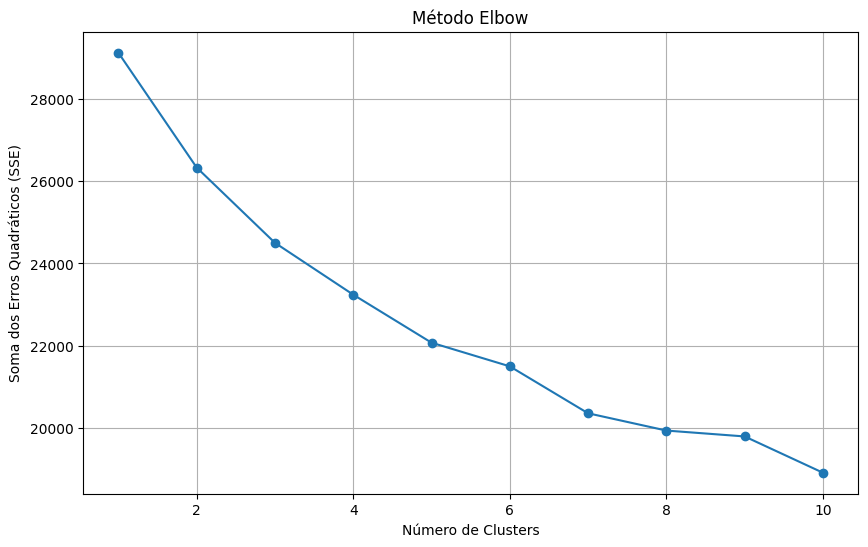

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
# https://www.kaggle.com/code/diegohurtadoo/customer-segmentation-kmeans-parameter-tuning#3.3--Parameter-Grid-

# Padronizando os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(data)

sse = []  # Lista para armazenar o erro quadrático total para diferentes números de clusters
k_range = range(1, 11)  # Testando de 1 a 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_train_scaled)
    sse.append(kmeans.inertia_)  # Armazena o erro quadrático total (SSE)

# Plot do Método Elbow
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma dos Erros Quadráticos (SSE)')
plt.title('Método Elbow')
plt.grid(True)
plt.show()

# Com base no gráfico Elbow, escolhemos o número de clusters ideal
optimal_clusters = 3

# Aplicando o K-Means com o número de clusters ideal
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
clusters = kmeans.fit_predict(X_train_scaled)

# Adicionando os rótulos dos clusters a base de dados original
X_train_clustered = data.copy()
X_train_clustered['Cluster'] = clusters


In [ ]:
# Ordenando a coluna dos Clusters pelo índice
X_train_clustered_sorted = X_train_clustered.sort_index()
print(X_train_clustered_sorted['Cluster'])

0      2
1      2
2      2
3      2
4      2
5      0
6      2
7      2
8      2
9      2
10     2
11     2
12     2
13     2
14     0
15     2
16     2
17     2
18     2
19     2
20     2
21     2
22     2
23     2
24     2
25     2
26     0
27     2
28     2
29     2
30     2
31     2
32     2
33     2
34     2
35     2
36     2
37     2
38     0
39     1
40     2
41     2
42     2
43     2
44     2
45     2
46     2
47     2
48     2
49     1
50     0
51     0
52     2
53     0
54     0
55     2
56     2
57     2
58     2
59     2
60     2
61     2
62     0
63     0
64     1
65     2
66     2
67     2
68     2
69     2
70     2
71     2
72     2
73     2
74     2
75     0
76     0
77     2
78     1
79     2
80     2
81     2
82     2
83     0
84     2
85     2
86     2
87     1
88     1
89     0
90     1
91     2
92     2
93     2
94     2
95     2
96     2
97     2
98     2
99     2
100    0
101    0
102    0
103    2
104    2
105    2
106    0
107    2
108    2
109    2
110    2
1

In [ ]:
# Ordenando a coluna dos Clusters pelos rótulos
X_train_clustered_sorted_by_cluster = X_train_clustered.sort_values(by='Cluster')
print(X_train_clustered_sorted_by_cluster[['Cluster']])

     Cluster
245        0
455        0
456        0
463        0
122        0
373        0
467        0
117        0
468        0
113        0
369        0
368        0
474        0
239        0
476        0
133        0
106        0
101        0
100        0
364        0
409        0
246        0
488        0
89         0
490        0
359        0
83         0
251        0
494        0
76         0
75         0
102        0
380        0
223        0
449        0
192        0
193        0
405        0
403        0
182        0
416        0
179        0
401        0
177        0
176        0
400        0
173        0
421        0
398        0
169        0
204        0
167        0
441        0
148        0
440        0
150        0
438        0
390        0
499        0
392        0
433        0
394        0
428        0
397        0
426        0
205        0
156        0
501        0
408        0
50         0
548        0
549        0
53         0
38         0
550        0
343        0

In [ ]:
cluster_counts = X_train_clustered['Cluster'].value_counts()
print(cluster_counts)

Cluster
2    438
0     95
1     27
Name: count, dtype: int64


Tendo o algoritmo executado e os clusters gerados, podemos visualizar melhor os clusters produzidos e os atributos usados na clusterização. Para isso, duas técnicas de redução de dimensionalidade para melhorar a exibição foram utilizadas: **PCA (Principal Component Analysis)** e **t-SNE (t-Distributed Stochastic Neighbor Embedding)**.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


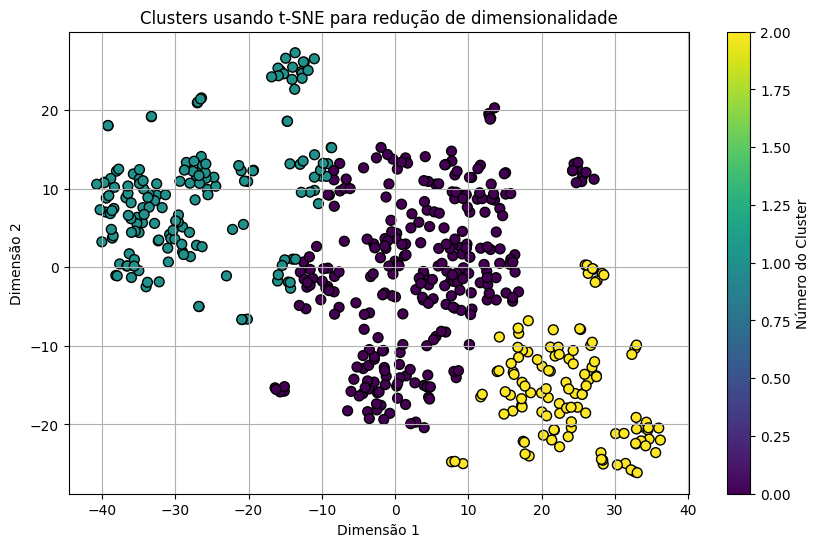

In [ ]:
from sklearn.manifold import TSNE

# Reduzindo a dimensionalidade para 2D com t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

# Aplicando o K-Means e obtendo os rótulos dos clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(X_train_tsne)

# Plotando os clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Clusters usando t-SNE para redução de dimensionalidade')
plt.xlabel('Dimensão 1')
plt.ylabel('Dimensão 2')
plt.colorbar(label='Número do Cluster')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


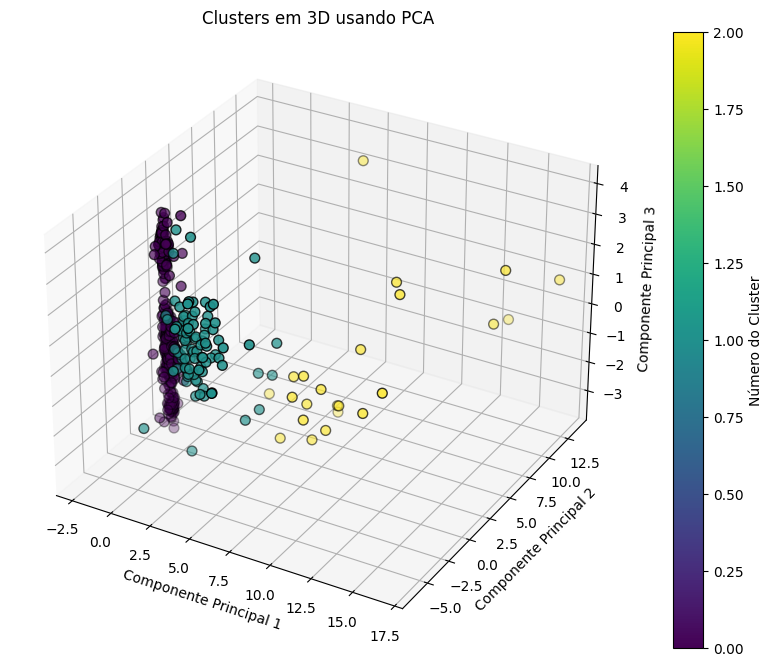

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Reduzindo a dimensionalidade para 3D com PCA
pca = PCA(n_components=3)
X_train_pca_3d = pca.fit_transform(X_train_scaled)

# Aplicando o K-Means e obtendo os rótulos dos clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(X_train_pca_3d)

# Plotando os clusters em 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_train_pca_3d[:, 0], X_train_pca_3d[:, 1], X_train_pca_3d[:, 2], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50)
ax.set_title('Clusters em 3D usando PCA')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
plt.colorbar(scatter, label='Número do Cluster')
plt.show()


A partir da geração e visualização dos clusters, a identificação dos padrões e perfis dos clientes agrupados é necessária junto dos especialistas do domnínio para além de validar o agrupamento realizado, entender melhor para quais dados devemos olhar a fim de prosseguir com o desenvolvimento do projeto.

A ideia é que tendo os perfis e as classes, torna-se possível executar o algoritmo **kNN (K-Nearest Neighbors)** em cima dos clusters de maior relevância. Isso possibilita a classificação dos clientes, utilizando-se de validação cruzada (Stratified K-Fold) e obtendo métricas para análise e comparação dos resultados com a expectativa/realidade como conclusão.

Respondendo a pergunta: **você acredita que será possível entregar tudo que prometeu no documento da proposta?**

R: A ideia inicial envolvia o cenário onde dado um novo cliente, seria possível identificar se o mesmo era um ICP ou não. Após reuniões com o professor, viu-se que devido a fatores dos quais não é capaz de se ter controle, esse objetivo era distante. A finalidade de analisar o cliente e tentar traçar possíveis perfis de elementos que fechariam negócio parece mais acessível no momento; isso já seria um bom passo em direção ao objetivo final posteriormente.

Portanto, fornecer percepções que tornem possível que um ICP seja esboçado em um futuro próximo parece totalmente viável e é o pontapé inicial para isso, mesmo que algumas estratégias tenham que ser alteradas durante o progresso.

Para executar a tarefa de implementação do KNN (K-Nearest Neighbors) nos clusters de interesse (0 e 1, nesse caso), os seguintes passos foram executados:


1.   Filtragem dos dados dos clusters de interesse
2.   Separação dos dados e atribuição da verdade sobre eles
3.   Divisão os dados em Conjunto de Treinamento e Teste
4.   Treinamento do Modelo
5.   Validação do Modelo através de Validação Cruzada
6.   Avaliação do desempenho no Conjunto de Teste



In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Filtrando os dados para os clusters 0 e 1
data_cluster_0 = X_train_clustered[X_train_clustered['Cluster'] == 0]
data_cluster_1 = X_train_clustered[X_train_clustered['Cluster'] == 1]

# Combinando os dados dos clusters 0 e 1
data_combined = pd.concat([data_cluster_0, data_cluster_1])

# Separando as features (X) e o target (y)
X_combined = data_combined.drop(['Apresentacao de Proposta', 'Cluster'], axis=1)
y_combined = data_combined['Apresentacao de Proposta']

# Dividindo os dados em conjunto de treinamento e teste
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(
    X_combined, y_combined, test_size=0.2, random_state=42, stratify=y_combined
)

# Treinando o modelo com os dados combinados
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_combined, y_train_combined)

# Prevendo as classes e probabilidades no conjunto de teste
y_pred_combined = knn.predict(X_test_combined)
y_proba_combined = knn.predict_proba(X_test_combined)[:, 1] if len(knn.classes_) > 1 else np.zeros(len(X_test_combined))

# Avaliando o modelo usando cross-validation
cv_scores = cross_val_score(knn, X_train_combined, y_train_combined, cv=5)  # 5-fold cross-validation
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

# Adicionando as probabilidades ao dataframe original para análise
X_test_combined['Probabilidade Cliente Ideal'] = y_proba_combined

# Exibindo a performance do modelo
print("Confusion Matrix:")
print(confusion_matrix(y_test_combined, y_pred_combined))
print("\nClassification Report:")
print(classification_report(y_test_combined, y_pred_combined))

Cross-validation scores: [0.75       0.75       0.78947368 0.84210526 0.73684211]
Mean cross-validation score: 0.7736842105263159
Confusion Matrix:
[[18  2]
 [ 5  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.90      0.84        20
           1       0.00      0.00      0.00         5

    accuracy                           0.72        25
   macro avg       0.39      0.45      0.42        25
weighted avg       0.63      0.72      0.67        25



As saídas acima fornecem informações sobre a performance do modelo KNN após a combinação dos clusters 0 e 1.


# 1.   Cross-Validation Scores
       [0.75, 0.75, 0.78947368, 0.84210526, 0.73684211]
  Esses valores representam a acurácia do modelo em cada uma das cinco iterações da validação cruzada. Os valores variam entre 0.73684211 e 0.84210526, indicando que o modelo tem uma performance consistente, mas não perfeita.

# 2.   Mean Cross-Validation Score
       [0.7736842105263159]
 Este é o valor médio da acurácia nas cinco iterações da validação cruzada. Com uma média de aproximadamente 0.774, o modelo novamente indica um desempenho razoável, mas não excelente.

# 3. Confusion Matrix
     [18  2
      5   0]
 A matriz de confusão mostra os seguintes valores:
*   **18 verdadeiros negativos**: o modelo previu corretamente a classe 0 (não cliente ideal) em 18 casos.
*   **2 falsos positivos**: o modelo previu incorretamente a classe 1 (cliente ideal) para 2 casos que eram da classe 0.
*   **5 falsos negativos**: o modelo previu incorretamente a classe 0 para 5 casos que eram da classe 1 (cliente ideal).
*   **0 verdadeiros positivos**: o modelo não conseguiu prever corretamente nenhum caso da classe 1.

# 4. Classification Report
                precision  recall   f1-score    support

           0       0.78      0.90      0.84        20
           1       0.00      0.00      0.00         5

           accuracy                           0.72     25
           macro avg       0.39      0.45     0.42     25
           weighted avg    0.63      0.72     0.67     25


*   Precision, Recall e F1-score:
    *   **Para a classe 0 (não cliente ideal):**
        * **Precision (0.78):** 78% das predições de classe 0 estavam corretas.
        * **Recall (0.90):** 90% dos casos que realmente eram classe 0 foram corretamente identificados.
        * **F1-score (0.84):** Combina precision e recall em uma única métrica; é um bom valor para a classe 0.
    * **Para a classe 1 (cliente ideal):**
        * **Precision (0.00):** O modelo não fez nenhuma predição correta para a classe 1.
        * **Recall (0.00):** Nenhum dos casos que realmente eram classe 1 foi identificado.
        * **F1-score (0.00):** Indica que o modelo falhou completamente em prever a classe 1.
* **Accuracy (0.72):** O modelo classificou corretamente 72% do conjunto de teste.

* **Macro avg:** Média das métricas precision, recall e f1-score sem levar em conta a distribuição das classes. O baixo valor (0.39 para precision, 0.45 para recall, e 0.42 para f1-score) reflete o mau desempenho na classe minoritária (classe 1).

* **Weighted avg:** Média ponderada das métricas, considerando a distribuição das classes. Embora a weighted avg seja um pouco melhor, ela ainda reflete o desequilíbrio e a dificuldade do modelo em prever a classe 1.




As imagens abaixo são representações gráficas dos valores obtidos durante a execução do modelo. Para exibir as informações de desempenho do modelo de KNN e facilitar a interpretação, alguns gráficos utilizados foram:

* **Matriz de Confusão:** um heatmap para visualizar a matriz de confusão, onde é possível ver a quantidade de classificações corretas e incorretas por classe.

* **Curva ROC (Receiver Operating Characteristic) e AUC (Area Under the Curve):** mostra o desempenho do classificador para vários limiares de probabilidade. Ideal para visualizar a taxa de verdadeiros positivos versus a taxa de falsos positivos.

* **Distribuição das Probabilidades:** um histograma para comparar a distribuição das probabilidades preditas para clientes ideais e não ideais, ajudando a visualizar onde o modelo se confunde.

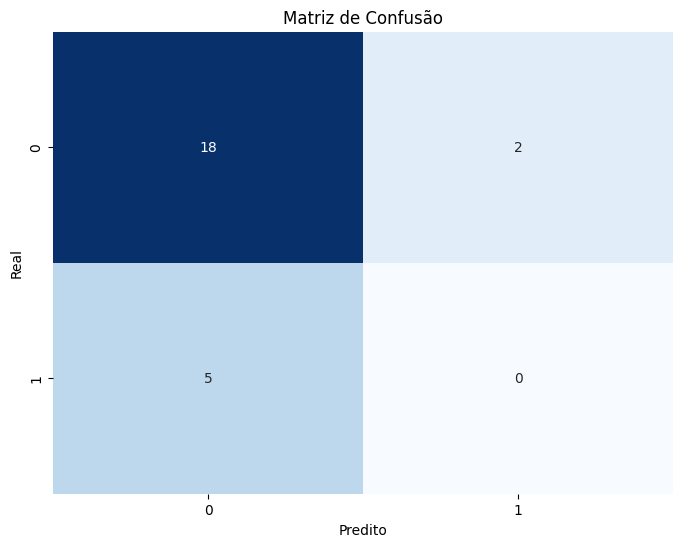

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Gerando a matriz de confusão
conf_matrix = confusion_matrix(y_test_combined, y_pred_combined)

# Plotando com seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title("Matriz de Confusão")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

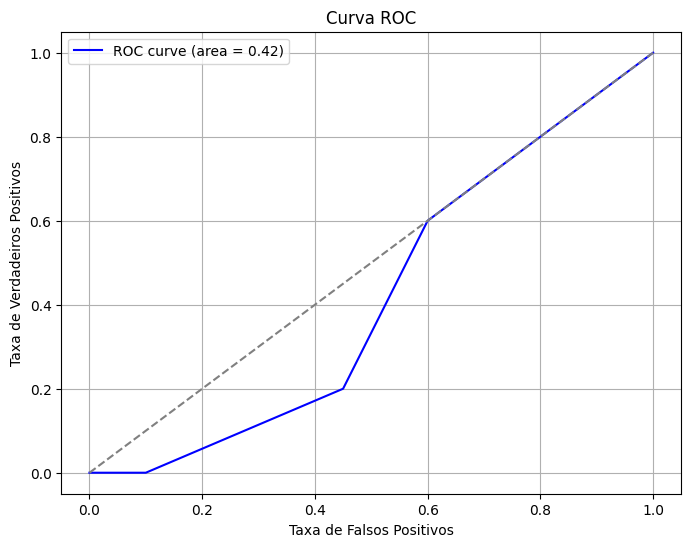

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculando a Curva ROC e AUC
fpr, tpr, _ = roc_curve(y_test_combined, y_proba_combined)
auc_score = roc_auc_score(y_test_combined, y_proba_combined)

# Plotando a Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend()
plt.grid(True)
plt.show()

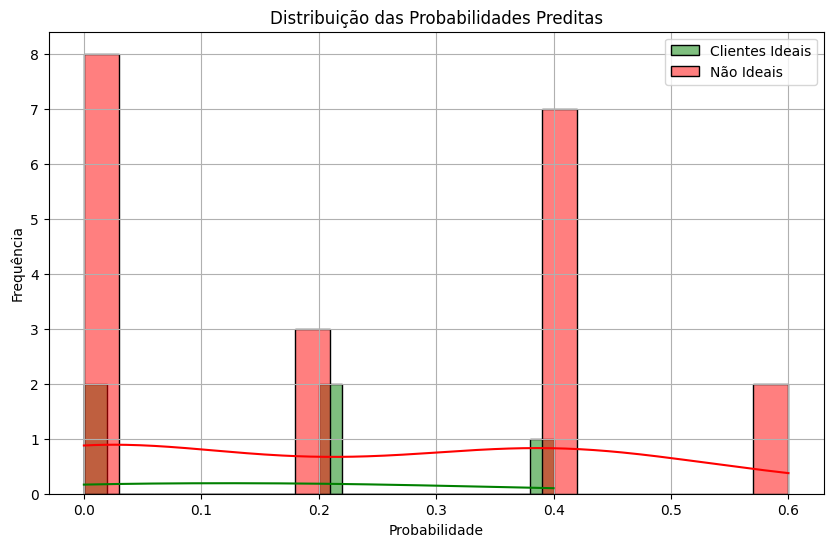

In [ ]:
plt.figure(figsize=(10, 6))

# Histograma para Clientes Ideais
sns.histplot(y_proba_combined[y_test_combined == 1], bins=20, color='green', label='Clientes Ideais', kde=True)

# Histograma para Não Ideais
sns.histplot(y_proba_combined[y_test_combined == 0], bins=20, color='red', label='Não Ideais', kde=True)


plt.title('Distribuição das Probabilidades Preditas')
plt.xlabel('Probabilidade')
plt.ylabel('Frequência')
plt.legend()
plt.grid(True)
plt.show()